# Seaborn Visualisation

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
%matplotlib inline
import seaborn as sns

## Load And Prepare Dataset 

In [206]:
wine=pd.read_csv("Wine.csv",header=None)
wine.shape 

(178, 14)

In [207]:
wine.columns = ['name','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']

In [208]:
wine_df=wine.colorIntensity.round()
wine=wine.drop(['colorIntensity'],axis=1)
wine_df=pd.concat([wine_df,wine],axis=1)

## Set Color Palette
 Color can add more value to the plot.

In [81]:
current_palette = sns.color_palette("cubehelix", 8) #select Color Palatte and number of colors
sns.set_palette(current_palette)   #Set the color palatte

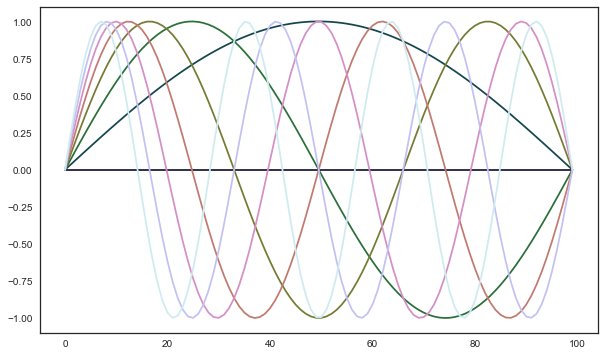

In [82]:
plt.figure(figsize=(10,6))
for i in range(8):
    t = linspace(0,i*math.pi,100)
    a = sin(t)
    plt.plot(a)

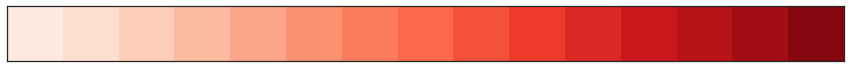

In [72]:
sns.palplot(sns.color_palette(palette = 'Reds', n_colors = 15, desat = None))

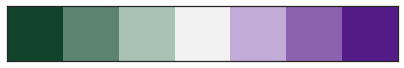

In [85]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))  # Can also be customised using diverging_palette function

# Visualizing statistical relationships

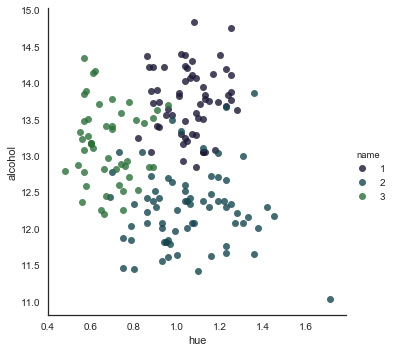

In [212]:
sns.lmplot(x='hue',y='alcohol',data=wine_df,fit_reg=False,hue='name') #Scatter plot without regression line

# Plotting with categorical data

## 1.Categorical scatterplots

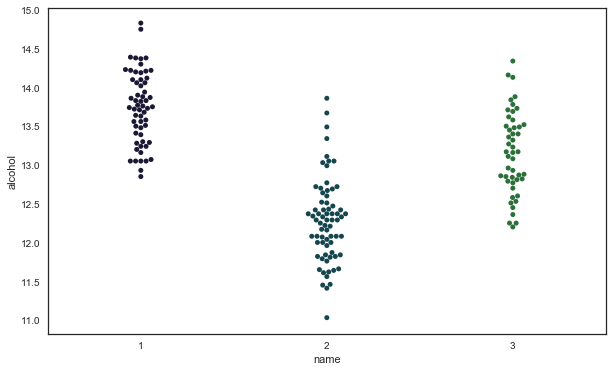

In [89]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='name', y='alcohol', data=wine_df)

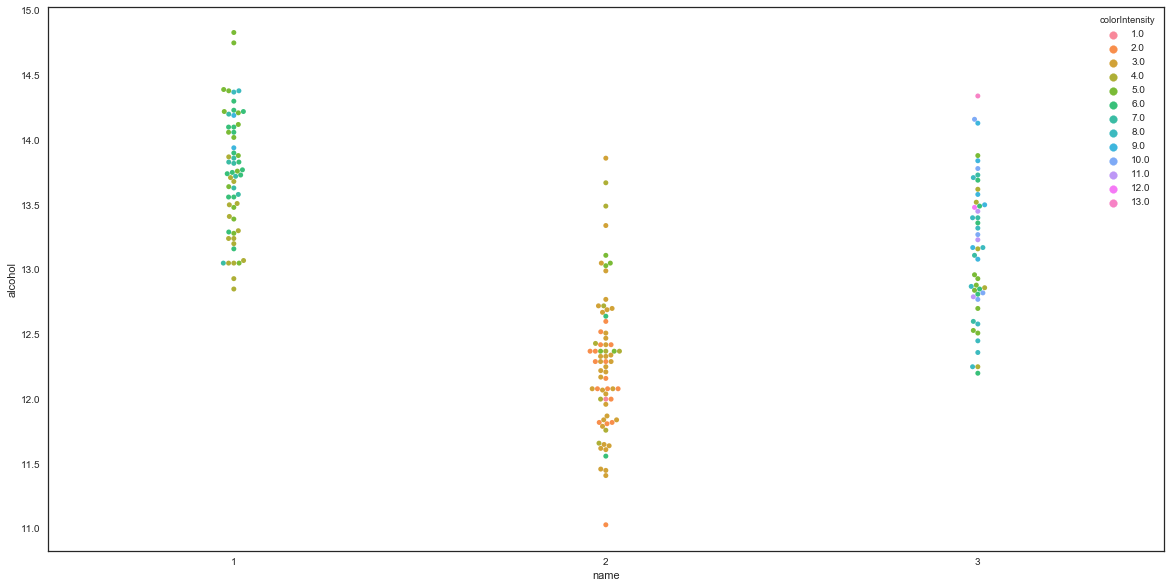

In [155]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='name', y='alcohol',hue='colorIntensity',data=wine_df)

## 2.Box Plot
Box plots provide more of a summary of a distribution can also be seen as an advantage in certain cases

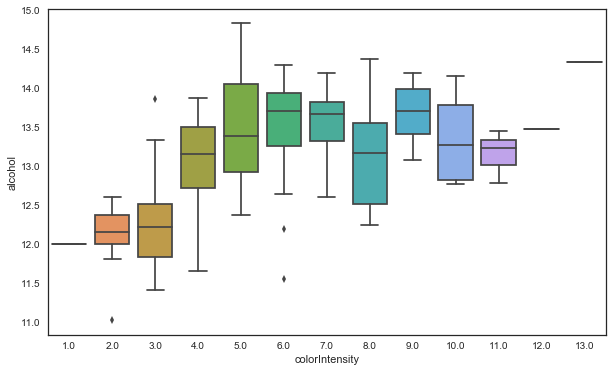

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(x='colorIntensity', y='alcohol', data=wine_df)

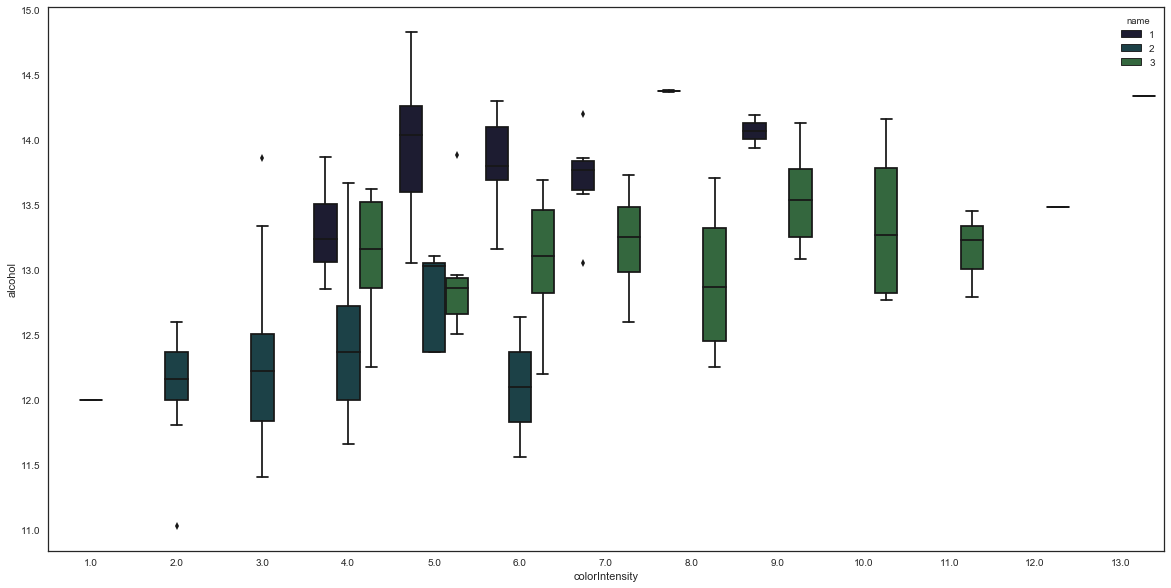

In [137]:
plt.figure(figsize=(20,10))
sns.boxplot(x='colorIntensity', y='alcohol',hue='name', data=wine_df)

## 3.Bar Plot

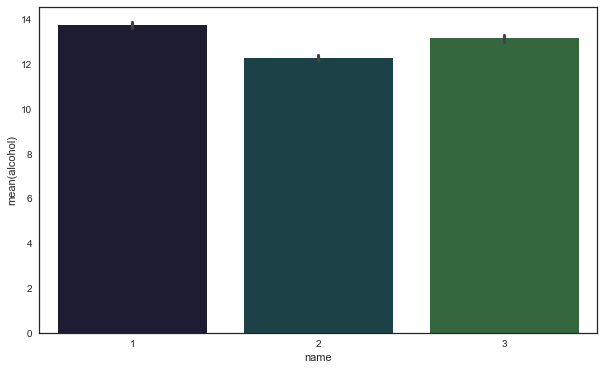

In [140]:
plt.figure(figsize=(10,6))
sns.barplot(x="name", y="alcohol",data=wine_df);

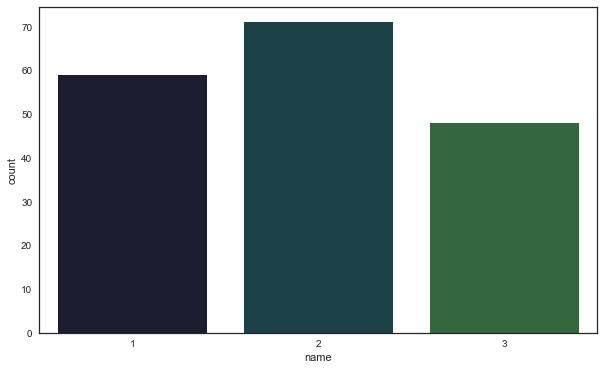

In [144]:
plt.figure(figsize=(10,6))
sns.countplot(x="name",data=wine_df);

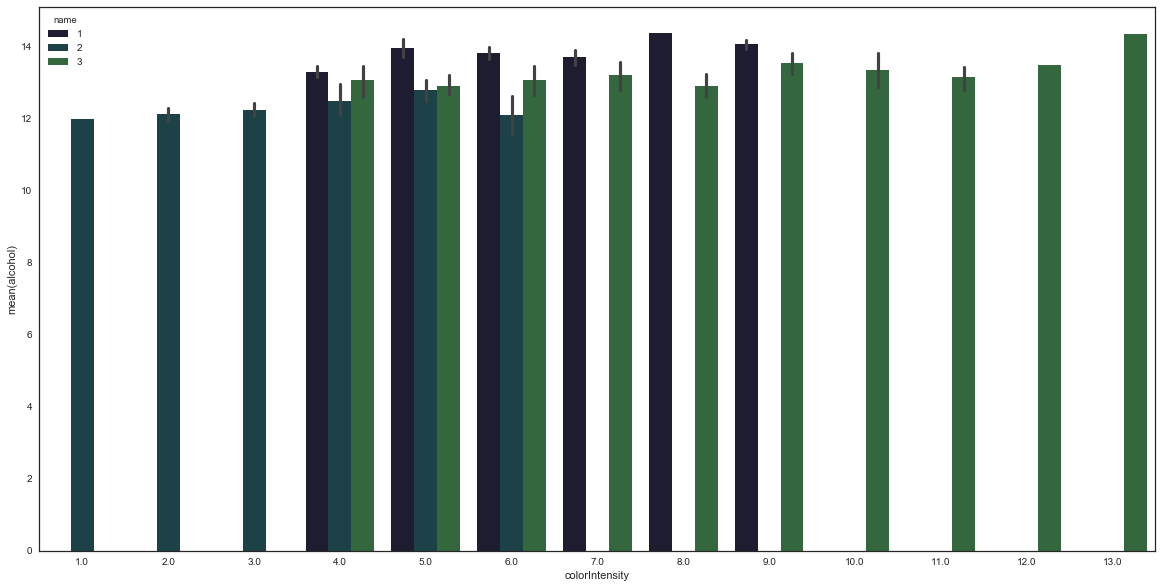

In [138]:
plt.figure(figsize=(20,10))
sns.barplot(x="colorIntensity", y="alcohol", hue="name",data=wine_df);

## 4. PointPlot

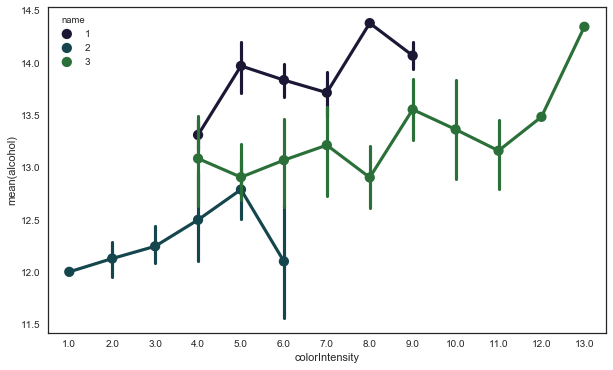

In [150]:
plt.figure(figsize=(10,6))
sns.pointplot(x="colorIntensity", y="alcohol",hue='name',data=wine_df);

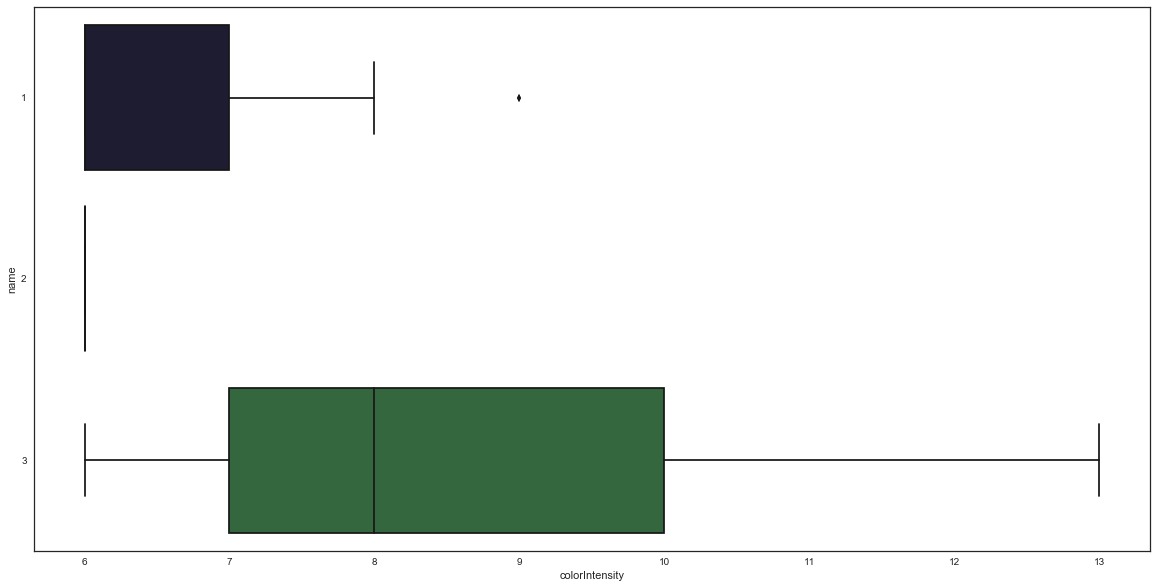

In [167]:
plt.figure(figsize=(20,10))
sns.boxplot(x="colorIntensity", y="name",orient="h",data=wine_df.query("colorIntensity > 5"))

# Visualizing the distribution of a dataset

## 1. Univariant Distribution

### Histogram

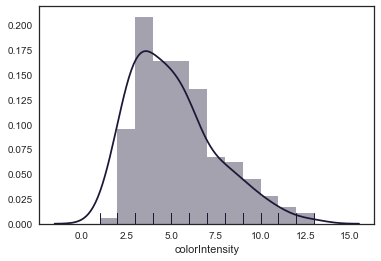

In [184]:
sns.distplot(wine_df['colorIntensity'], kde=True, rug=True);

### KDE
The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

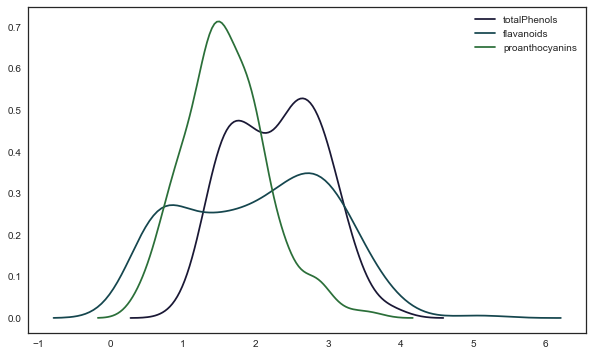

In [188]:
plt.figure(figsize=(10,6))
sns.kdeplot(wine_df['totalPhenols'])
sns.kdeplot(wine_df['flavanoids'])
sns.kdeplot(wine_df['proanthocyanins'])
plt.legend();

## 2. Bivariant Distribution

### Scatter Plot
Scatter Plot visualizes relationship between two variables. They show how much one variable is affected by another. It is the most commonly used data visualization technique and helps in drawing useful insights when comparing two variables. The relationship between two variables is called correlation. 

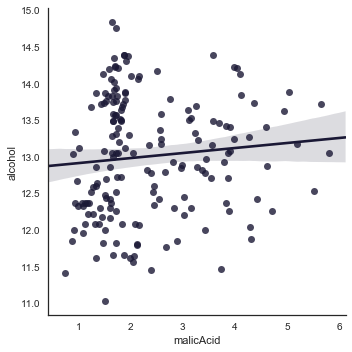

In [171]:
sns.lmplot(x='malicAcid',y='alcohol',data=wine_df)

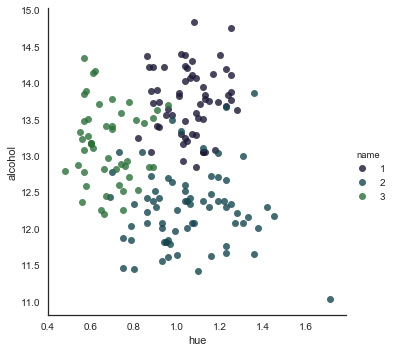

In [172]:
sns.lmplot(x='hue',y='alcohol',data=wine_df,fit_reg=False,hue='name') #Scatter plot without regression line


### Joint Plot
Joint Plot analyzes the relationship between two variables and describe their individual distributions on the same plot.

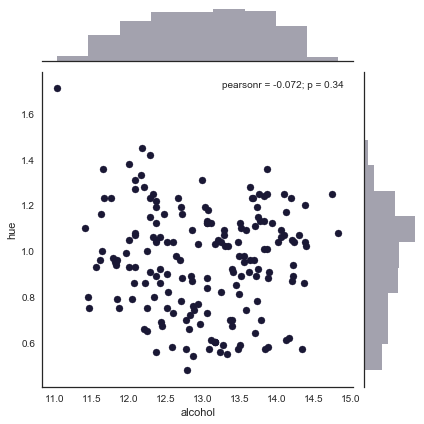

In [173]:
sns.jointplot(wine_df.alcohol, wine_df.hue)

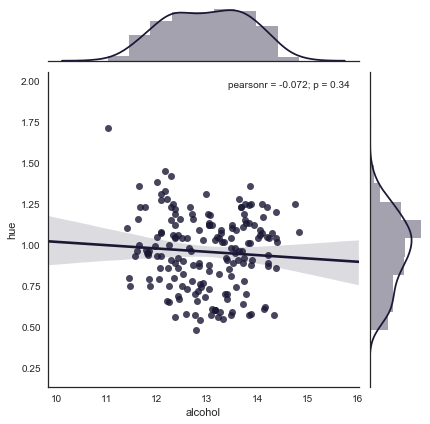

In [175]:
sns.jointplot(wine_df.alcohol, wine_df.hue,kind='reg')

### KDE

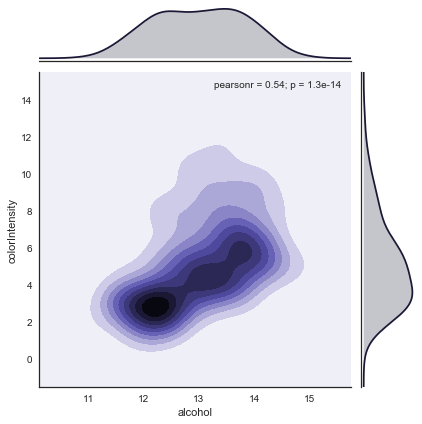

In [196]:
sns.jointplot(x="alcohol", y="colorIntensity", data=wine_df, kind="kde"); #KDE using Joint Plot 

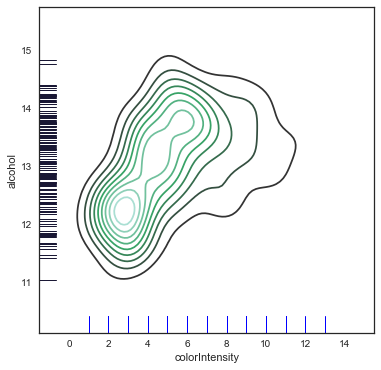

In [201]:
f, ax = plt.subplots(figsize=(6, 6)) 
sns.kdeplot(wine_df.colorIntensity, wine_df.alcohol, ax=ax) #KDE using KDE Plot 
sns.rugplot(wine_df.colorIntensity, color="b", ax=ax)
sns.rugplot( wine_df.alcohol, vertical=True, ax=ax);

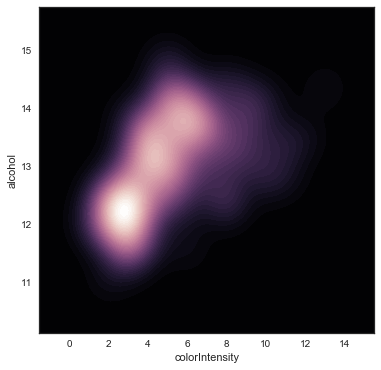

In [202]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)  #KDE plot continuously
sns.kdeplot(wine_df.colorIntensity, wine_df.alcohol, cmap=cmap, n_levels=60, shade=True);

### Pair Plot
Visualize the relationship between each variable with the other variables.


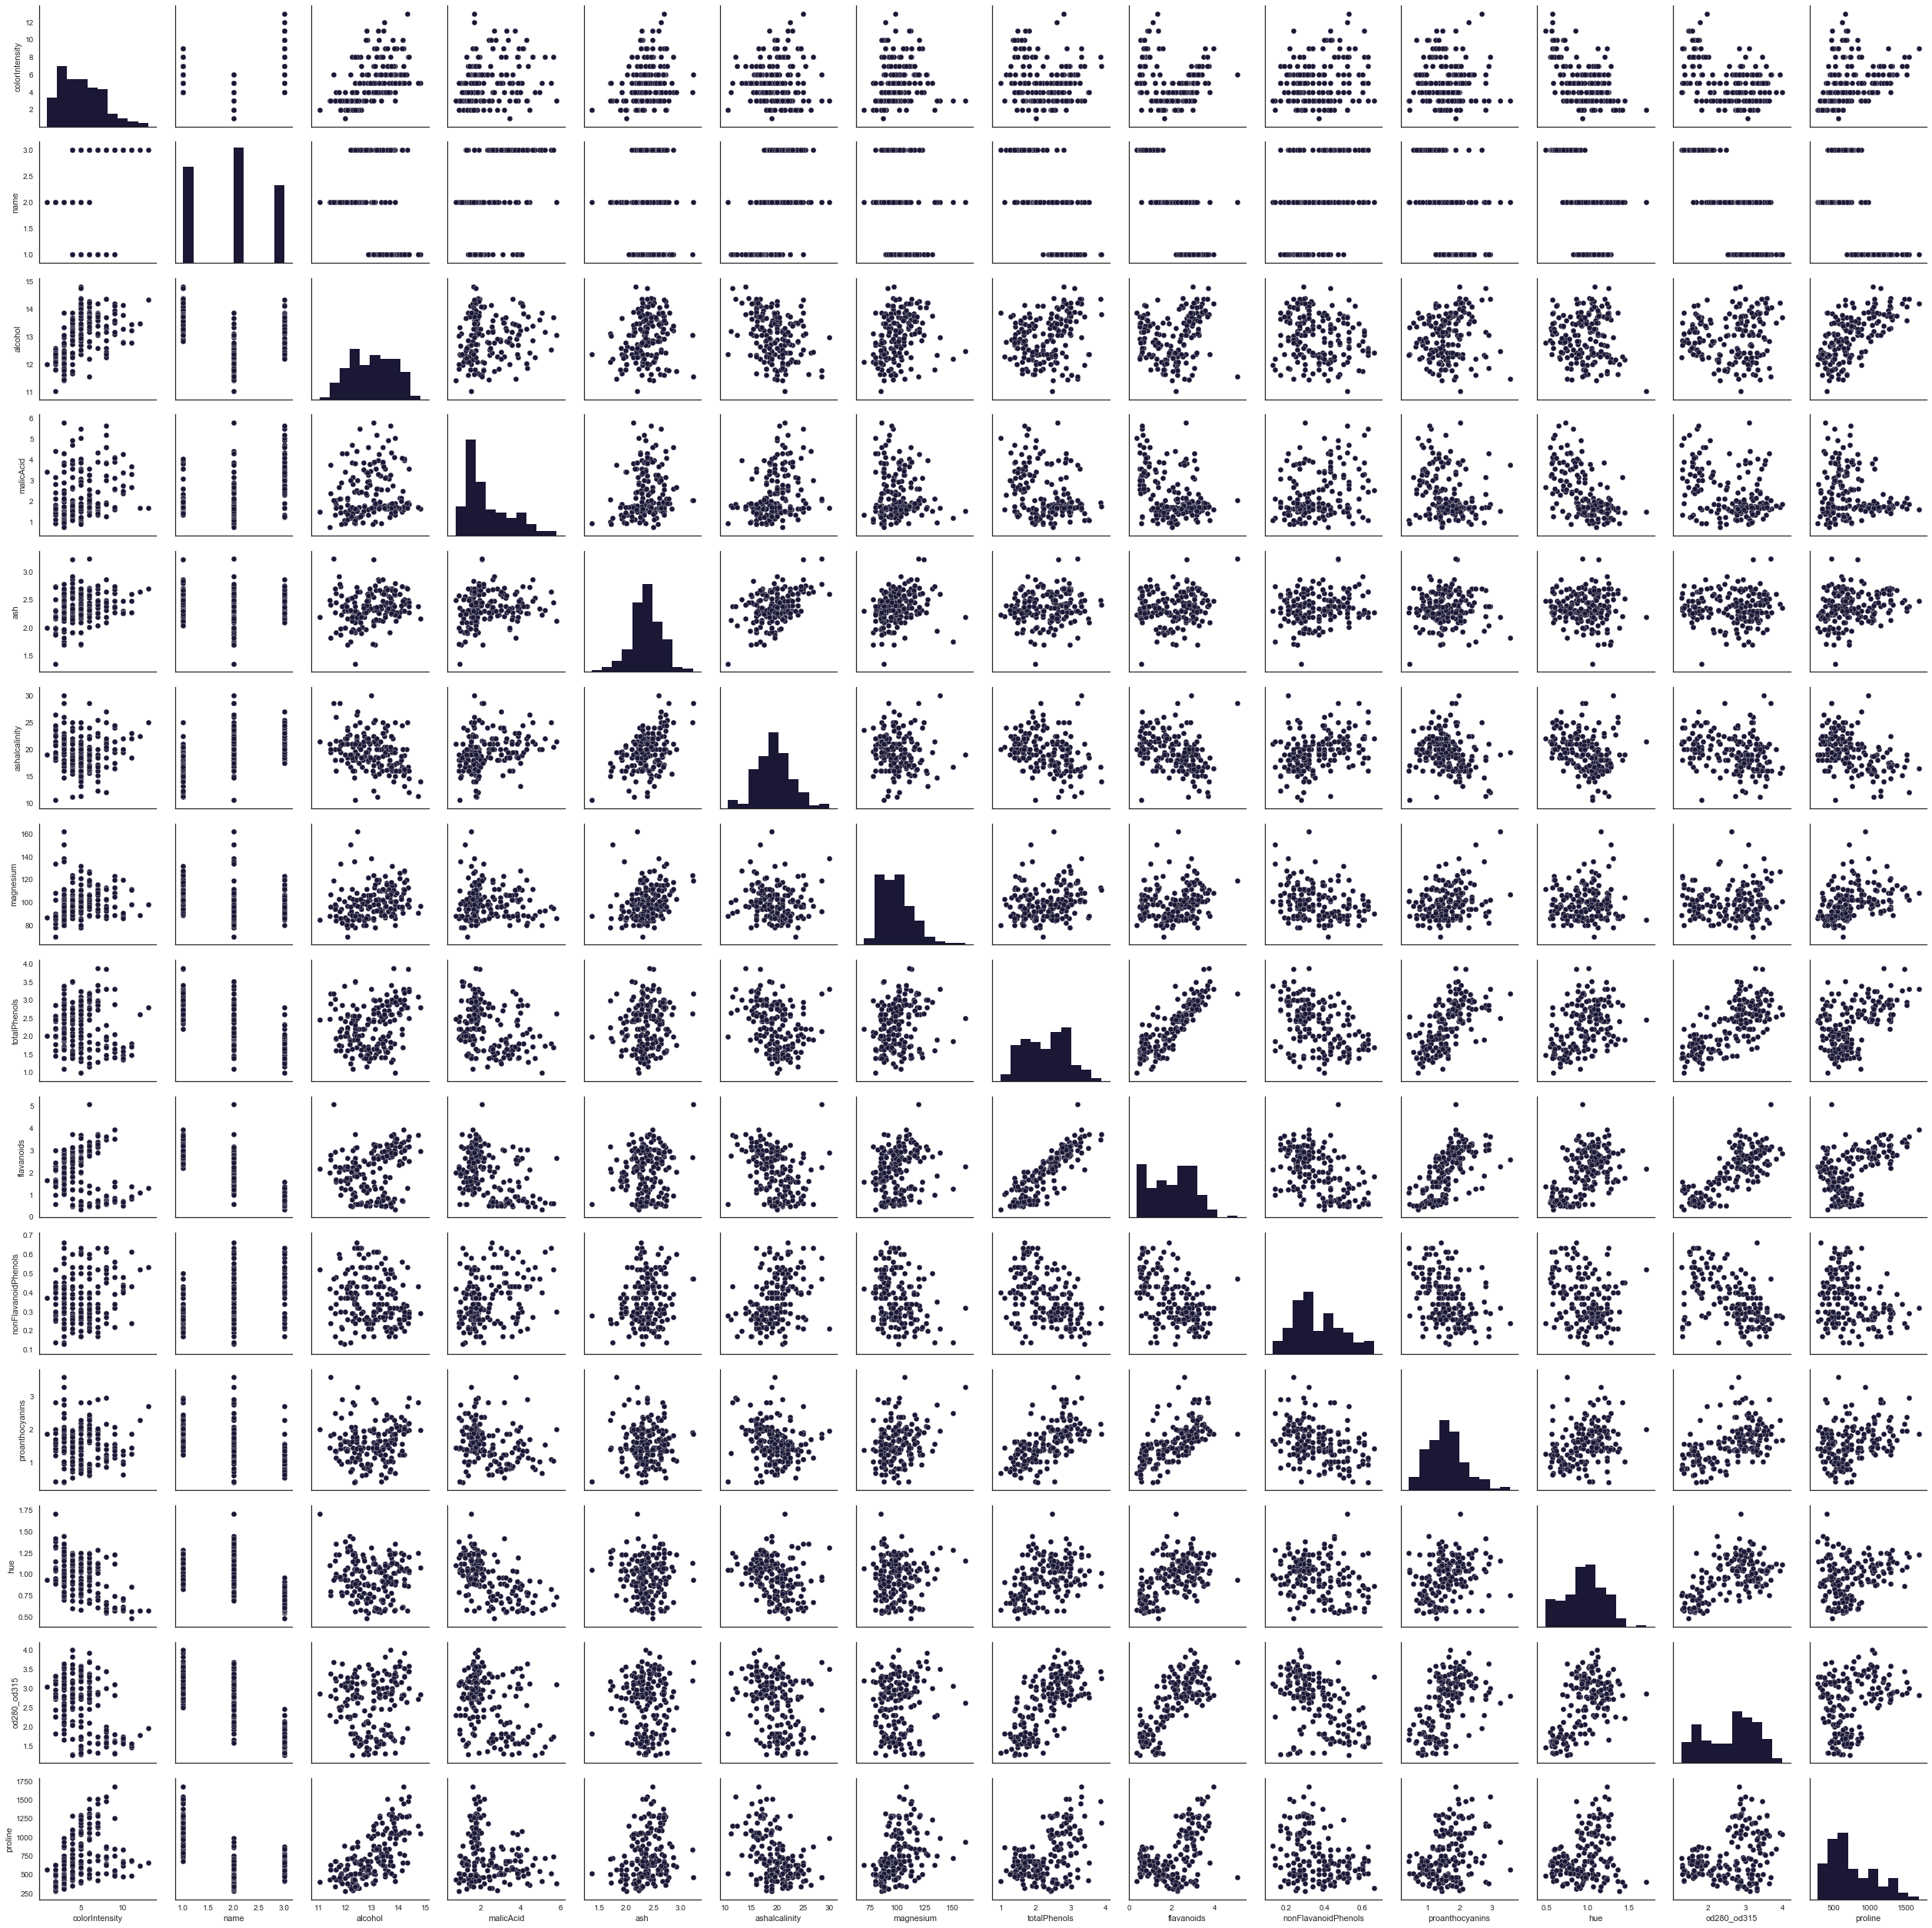

In [203]:
sns.pairplot(data=wine_df) 

C:\Users\Shreya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


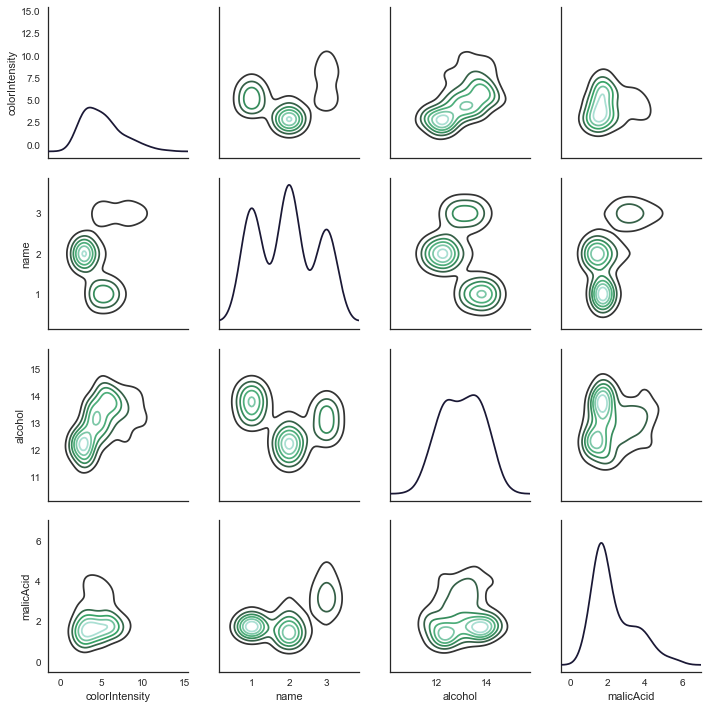

In [205]:
g = sns.PairGrid(wine_df.iloc[:,:4])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# Visualizing linear relationships
Used to visualize a linear relationship as determined through regression. Plots the resulting regression line and a 95% confidence interval for that regression

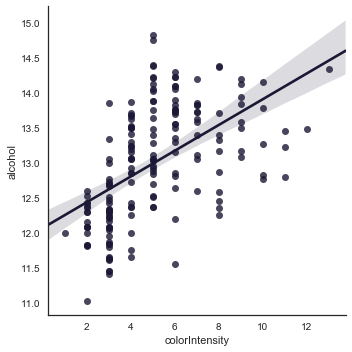

In [227]:
sns.lmplot(x="colorIntensity", y="alcohol", data=wine_df);

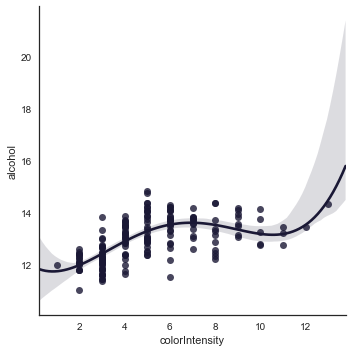

In [230]:
sns.lmplot(x="colorIntensity", y="alcohol",order=4, data=wine_df);

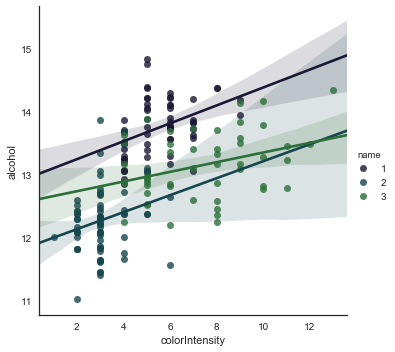

In [232]:
sns.lmplot(x="colorIntensity", y="alcohol",hue='name', data=wine_df) #Categorize

## Correlation

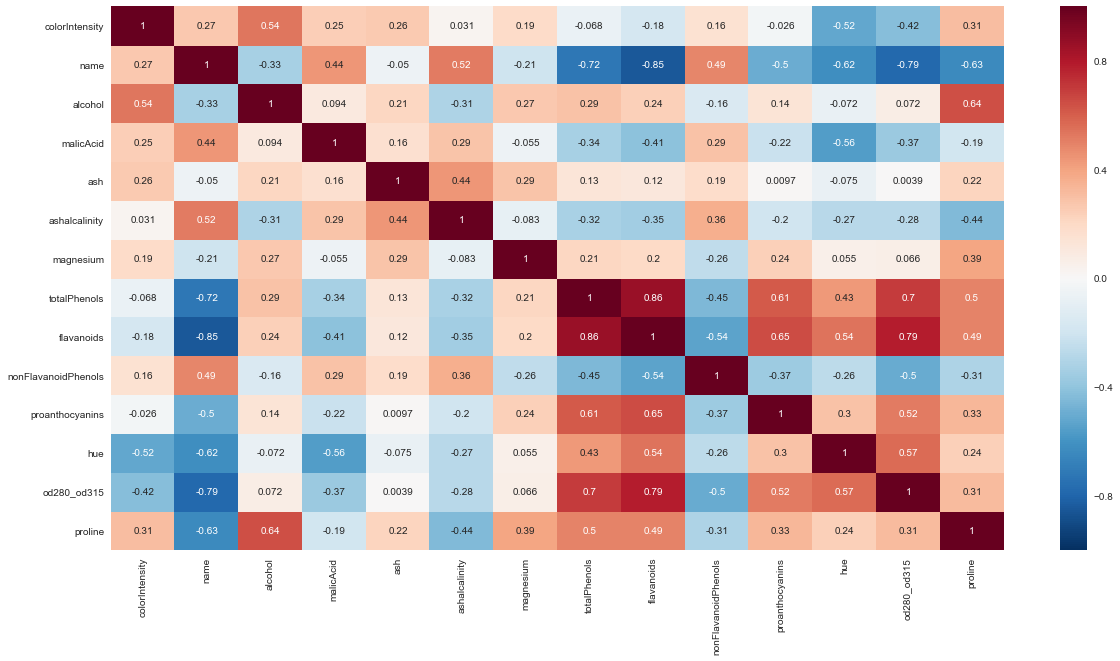

In [214]:
plt.figure(figsize=(20,10))
corr=wine_df.corr()
sns.heatmap(corr, annot=True)